## AUTOARIMA e Prophet

In [1]:
#Importando a biblioteca
import pandas as pd

#Lendo a base de dados
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=16, engine="python")
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [2]:
#Deletando a coluna e a linha "Total"
dados.drop("Total", axis = 1, inplace=True)
dados.drop(19, inplace=True)

In [3]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [4]:
#Usando o método melt
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [5]:
#Criando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


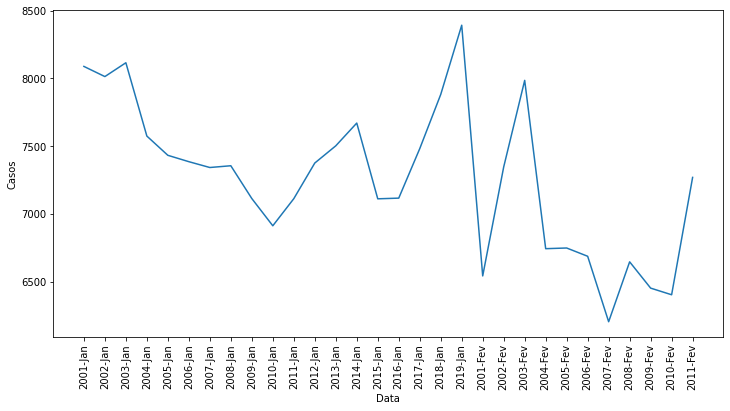

In [6]:
#Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

#Plotando a série temporal
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st[:30])

#Formatando o gráfico
plt.xticks(rotation = 90)

plt.show()

In [7]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


In [8]:
#Criando um dicionário dos meses
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_st["Mês"] = dados_st["Mês"].map(meses_port_ing)
dados_st.sample(5)

,Ano Diagnóstico,Mês,Casos,Data
210,2002,Dec,6809,2002-Dez
169,2018,Sep,7663,2018-Set
49,2012,Mar,7882,2012-Mar
117,2004,Jul,7825,2004-Jul
177,2007,Oct,7465,2007-Out


In [9]:
#Atualizando a coluna "Data"
dados_st["Data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [10]:
#Transformando a string em data
dados_st["Data"] = pd.to_datetime(dados_st["Data"])
dados_st

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [11]:
#Obtendo informações sobre o DataFrame
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [12]:
#Selecionando as colunas de interesse
dados_st = dados_st[["Data", "Casos"]]
dados_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


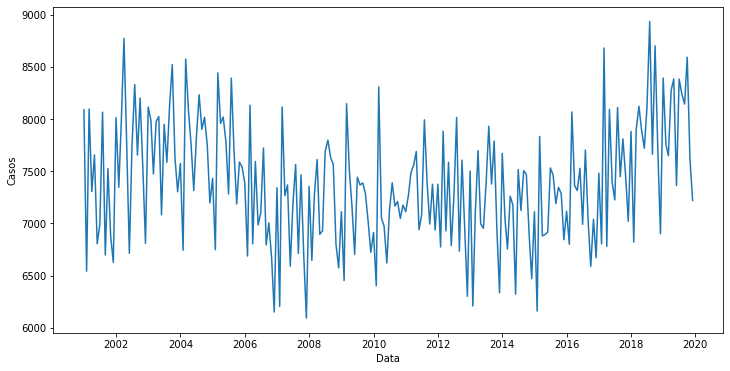

In [13]:
#Plotando o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_st)

#Formatando o gráfico
plt.xticks(rotation = 0)

plt.show()

In [14]:
#Ordenando os dados pela data e resetando o índice
dados_st.sort_values(by=["Data"], inplace=True)
dados_st.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


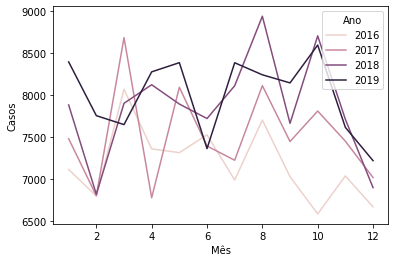

In [15]:
#Separando os anos e os meses e transformado em data
dados_st["Ano"] = dados_st["Data"].dt.year
dados_st["Mês"] = dados_st["Data"].dt.month

#Plotando o gráfico para os 4 últimos anos
sns.lineplot(x="Mês", y="Casos", data=dados_st.query("Ano in [2019, 2018, 2017, 2016]"), hue="Ano")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


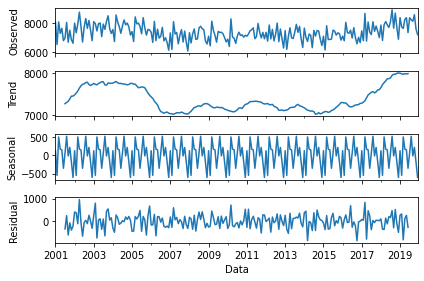

In [16]:
#Importando a biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

#Decompondo a série temporal
#Colocando a coluna "Data" como índice
decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"))

#Plotando os gráficos
decomposicao.plot();

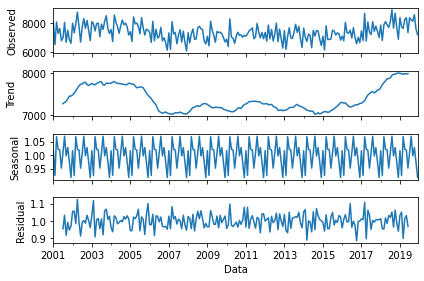

In [17]:
#Decompondo a série temporal
#Colocando a coluna "Data" como índice
#A decomposição agora é multiplicativa e não aditiva
decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"), model = "multiplicative")

#Plotando os gráficos
decomposicao.plot();

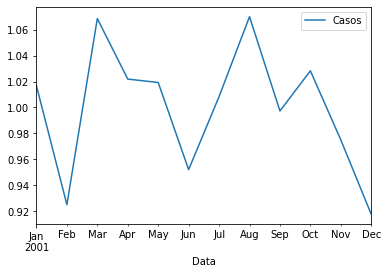

In [18]:
#Plotando a sazonalidade mês a mês
decomposicao.seasonal[:12].plot()

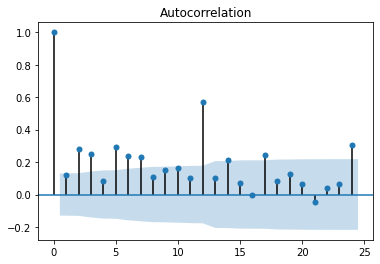

In [19]:
#Importando a biblioteca
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plotando a autocorrelação (de -1 a 1)
#Eixo x é o atraso na análise de correlação (lags)
plot_acf(dados_st["Casos"]);

#O que está dentro do intervalo de confiança são correlações irrelevantes

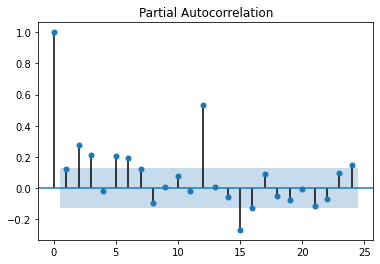

In [20]:
#Plotando a autocorrelação parcial
#É normalizada pela autocorrelação de lag 1
plot_pacf(dados_st["Casos"]);

### Base de dados AirPassengers

In [21]:
#Lendo a base de dados
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"
dados_passageiros = pd.read_csv(url_passageiros)

In [22]:
#Exibindo a base de dados
dados_passageiros

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [23]:
#Transformando a string em data
dados_passageiros["Month"] = pd.to_datetime(dados_passageiros["Month"])

#Obtendo informações sobre o DataFrame
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


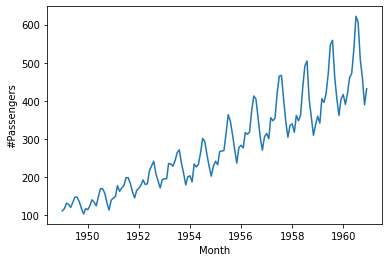

In [24]:
#Plotando o gráfico
sns.lineplot(x="Month", y="#Passengers", data=dados_passageiros)

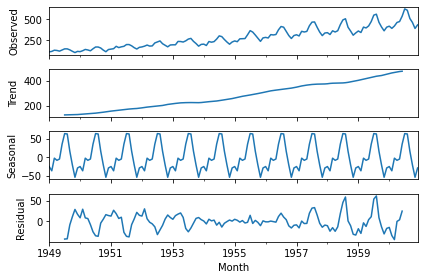

In [25]:
#Decompondo a série temporal
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"))

#Plotando os gráficos
decomposicao_p.plot();

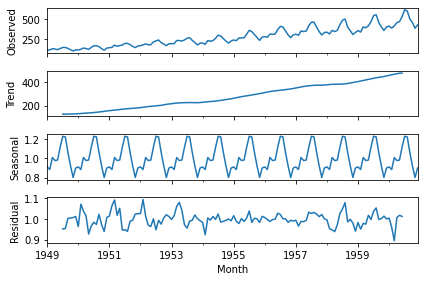

In [26]:
#Decompondo a série temporal
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"), model="multiplicative")

#Plotando os gráficos
decomposicao_p.plot();

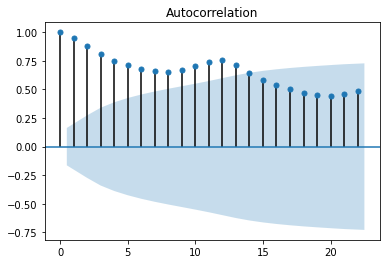

In [27]:
#Plotando a autocorrelação
plot_acf(dados_passageiros["#Passengers"]);

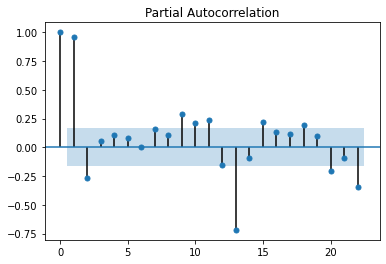

In [28]:
#Plotando a autocorrelação parcial
plot_pacf(dados_passageiros["#Passengers"]);

In [29]:
#Renomeando as colunas e transformando a string em data
dados_passageiros.rename({"Month": "Data", "#Passengers": "Passageiros"}, axis=1, inplace=True)
dados_passageiros["Mês"] = dados_passageiros["Data"].dt.month

In [30]:
#Transformando a string em data
dados_passageiros["Ano"] = dados_passageiros["Data"].dt.year
dados_passageiros

,Data,Passageiros,Mês,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


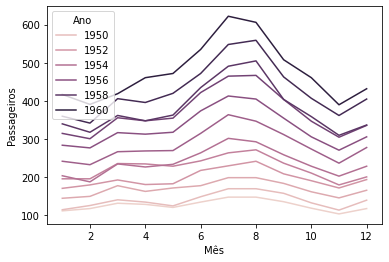

In [31]:
#Plotando o gráfico
sns.lineplot(x="Mês", y="Passageiros", data=dados_passageiros, hue="Ano")

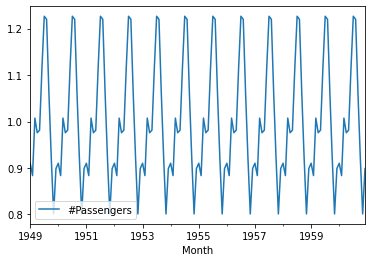

In [32]:
#Decompondo apenas os dados de sazonalidade
decomposicao_p.seasonal.plot()

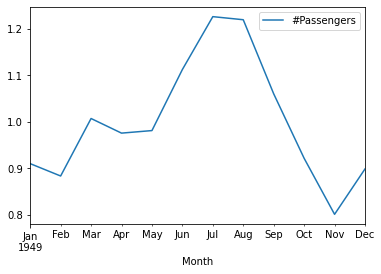

In [33]:
#Plotando a sazonalidade mês a mês
decomposicao_p.seasonal[:12].plot()

### Continuando a aula...

In [34]:
#Importando a biblioteca
from statsmodels.tsa.arima_model import ARIMA

#Separando os dados de treino e de teste
#Previsão apenas de 2019
dados_treino = dados_st.query("Ano != 2019")
dados_teste = dados_st.query("Ano == 2019")

#Instanciando o modelo ARIMA
#Apenas o dados de treino
modelo_arima = ARIMA(dados_treino["Casos"].values.astype("float32"), order=[12,1,2]) #Preciso alterar o tipo dos dados para passar para o modelo ARIMA

#Ajustando/treinando o modelo
modelo_arima_treinado = modelo_arima.fit()

#Realizando a previsão
previsao = modelo_arima_treinado.forecast(12)[0] #Quantos passos eu quero prever: 12 (meses)
#O primeiro elemento da tupla é a previsão

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


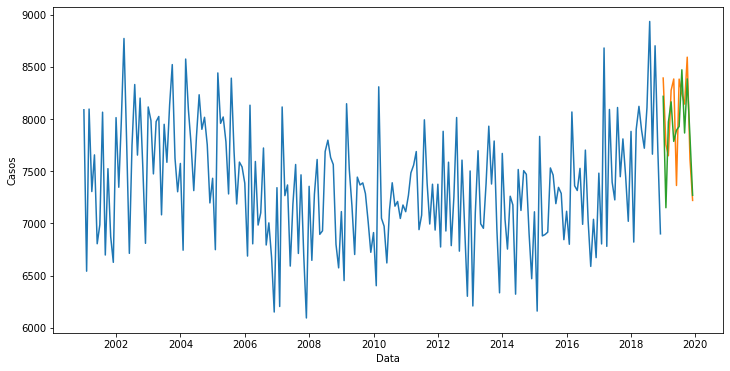

In [35]:
#Criando a coluna "Previsão"
dados_teste["Previsão"] = previsao

#Plotando o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Casos", data=dados_treino)
sns.lineplot(x="Data", y="Casos", data=dados_teste) #Em laranja
sns.lineplot(x="Data", y="Previsão", data=dados_teste) #Em verde

### Base de dados AirPassengers





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


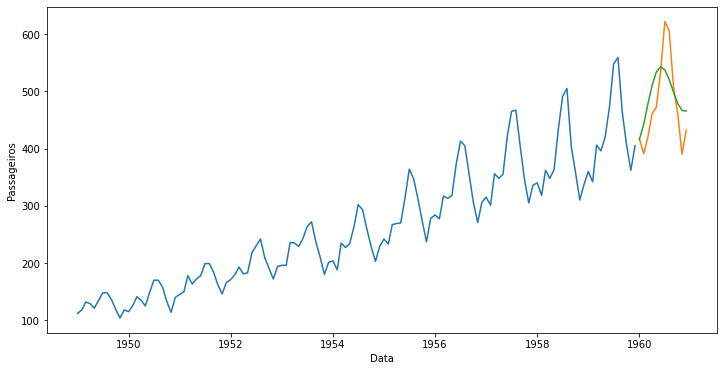

In [36]:
#Separando os dados de treino e de teste
#Previsão apenas de 1960
dados_treino_passageiros = dados_passageiros.query("Ano != 1960")
dados_teste_passageiros = dados_passageiros.query("Ano == 1960")

#Aplicando o modelo ARIMA
modelo_arima = ARIMA(dados_treino_passageiros["Passageiros"].values.astype("float32"), order=[2,1,2])

#Ajustando o modelo
modelo_arima_treinado = modelo_arima.fit()

#Realizando a previsão
previsao = modelo_arima_treinado.forecast(12)[0]

#Criando a coluna "Previsão"
dados_teste_passageiros["Previsão"] = previsao

#Plotando o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(x="Data", y="Passageiros", data=dados_treino_passageiros)
sns.lineplot(x="Data", y="Passageiros", data=dados_teste_passageiros)
sns.lineplot(x="Data", y="Previsão", data=dados_teste_passageiros)

### Continuando a aula...

In [37]:
#!pip install pmdarima

In [38]:
#Importando a biblioteca
from pmdarima.arima import auto_arima

#Instanciando o modelo
#Quando a componente de sazonalidade é adicionada, o modelo é SARIMA
modelo_autoarima = auto_arima(dados_treino["Casos"].values, error_action="ignore", trace=True, seasonal=True, m = 12) #m = 12 para dados mensais

ModuleNotFoundError: ignored

**AIC: Akaike information criterion**

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:

- the number of independent variables used to build the model.
- the maximum likelihood estimate of the model (how well the model reproduces the data).

The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.

### Desafio 01: Variar os parâmetros max_p(d, q)

In [ ]:
#Realizando a previsão
modelo_autoarima.predict(12) 

In [ ]:
#Realizando a previsão
previsao_autoarima = modelo_autoarima.predict(12) 

#Criando a coluna "Previsão"
dados_teste["Previsão_autoarima"] = previsao_autoarima

#Plotando o gráfico
plt.figure(figsize=(12,6))
#sns.lineplot(x="Data", y="Casos", data=dados_treino)
sns.lineplot(x="Data", y="Casos", data=dados_teste)
sns.lineplot(x="Data", y="Previsão_autoarima", data=dados_teste)
sns.lineplot(x="Data", y="Previsão", data=dados_teste)

In [ ]:
#Importando a biblioteca
from sklearn.metrics import mean_squared_error

#Calculando o erro quadrático médio
resultado_autoarima = mean_squared_error(dados_teste["Casos"], dados_teste["Previsão_autoarima"])
resultado_arima = mean_squared_error(dados_teste["Casos"], dados_teste["Previsão"])

#Imprimindo os resultados
print(f"Autoarima = {resultado_autoarima}") #menor erro
print(f"Arima = {resultado_arima}")

### Desafio 02: Testar vários parâmetros para os dados de passageiros



### Base de dados AirPassengers

In [ ]:
#Importando a biblioteca
from fbprophet import Prophet

#Instanciando o
modelo_profeta = Prophet(seasonality_mode="multiplicative")

#Renomeando os dados
mapa = {"Data": "ds", "Passageiros": "y"} #É necessário que tenha esses nomes específicos
dados_treino_passageiros_profeta = dados_treino_passageiros[["Data", "Passageiros"]].rename(mapa, axis=1)

#Treinando o modelo
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_passageiros_profeta)

In [ ]:
#Criando datas futuras na série temporal
futuro = modelo_profeta_treinado.make_future_dataframe(periods=12, freq="M")
futuro

In [ ]:
#Realizando a previsão
#yhat é a previsão
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

In [ ]:
#Plotando o resultado
#Os pontos são os valores reais
modelo_profeta_treinado.plot(resultado_profeta);

### Desafio 03: Plotar os valores reais e valores previstos pelo "profeta". Fazer a mesma análise para os dados de tuberculose